## Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Load the dataset

In [2]:
url = "https://raw.githubusercontent.com/sakib-2008047/ML-Practice/refs/heads/main/ICC%20WC23/batting_summary_ICC%20WC23.csv"
df = pd.read_csv(url)
df.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.300
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.300
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.500
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.300
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.700


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-null    object
 6   Runs              916 non-null    int64 
 7   Balls             916 non-null    int64 
 8   4s                916 non-null    int64 
 9   6s                916 non-null    int64 
 10  Strike_Rate       916 non-null    object
dtypes: int64(6), object(5)
memory usage: 78.8+ KB


## Predict *'Strike Rate'* based on *'Runs'*

In [4]:
df['Strike_Rate'] = pd.to_numeric(df['Strike_Rate'], errors='coerce')
df = df.dropna(subset=['Strike_Rate', 'Runs'])      # Drop rows where "Balls" or "Strike_Rate" is none

In [5]:
# Independent variable (Runs)
# Dependent variable (Strike Rate)

x = df[["Runs"]]
y = df[["Strike_Rate"]]

In [7]:
# Remove rows with NaN values
x = x.dropna()
y = y.dropna()

# Ensure both x and y have the same length
min_len = min(len(x), len(y))
x = x[:min_len]
y = y[:min_len]

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()

In [10]:
model = reg.fit(x,y)
print(model.coef_)
print(model.intercept_)

[[0.64085379]]
[65.39960507]


Text(0.5, 1.0, 'Runs vs Strike Rate')

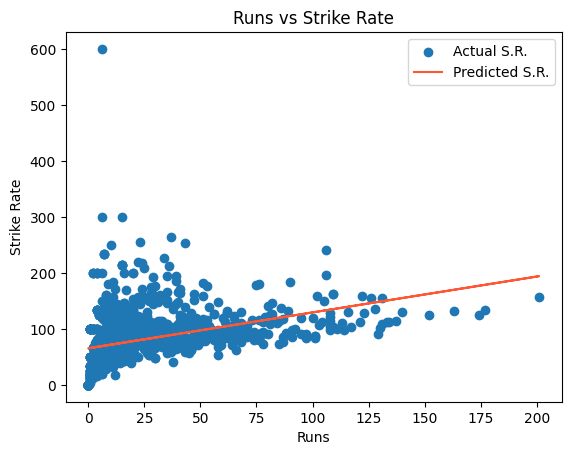

In [11]:
plt.scatter(x,y,label = 'Actual S.R.')
plt.plot(x, reg.predict(x),label = 'Predicted S.R.', c = "#FF5733")
plt.legend(loc='upper right')
plt.ylabel("Strike Rate")
plt.xlabel("Runs")
plt.title("Runs vs Strike Rate")

In [12]:
reg.score(x,y)

0.1407475936178374

## Predict *'Strike Rate'* based on *'Balls'*

In [13]:
df['Strike_Rate'] = pd.to_numeric(df['Strike_Rate'], errors='coerce')
df = df.dropna(subset=['Strike_Rate', 'Balls'])      

In [14]:
x1 = df[["Balls"]]
y1 = df[["Strike_Rate"]]

In [15]:
x1 = x1.dropna()
y1 = y1.dropna()

min_len = min(len(x1), len(y1))
x1 = x1[:min_len]
y1 = y1[:min_len]

In [16]:
model1 = reg.fit(x1,y1)
print(model1.coef_)
print(model1.intercept_)

[[0.31874762]]
[73.18961244]


Text(0.5, 1.0, 'Balls vs Strike Rate')

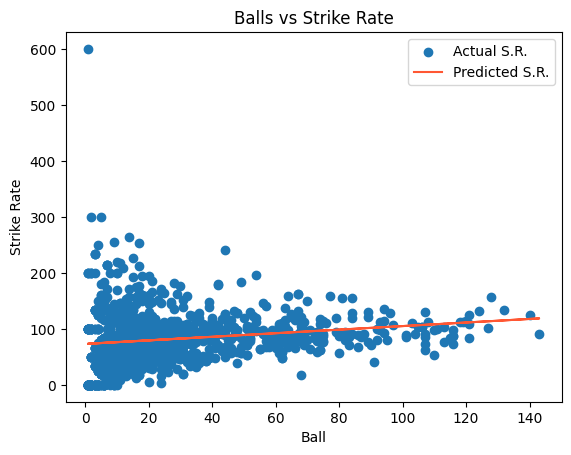

In [17]:
plt.scatter(x1,y1,label = 'Actual S.R.')
plt.plot(x1, reg.predict(x1),label = 'Predicted S.R.', c = "#FF5733")
plt.legend(loc='upper right')
plt.ylabel("Strike Rate")
plt.xlabel("Ball")
plt.title("Balls vs Strike Rate")

In [18]:
reg.score(x1,y1)

0.02976251453546197

## 6s base on Balls

In [19]:
df['6s'] = pd.to_numeric(df['6s'], errors='coerce')
df = df.dropna(subset=['6s', 'Balls'])      

In [20]:
x2 = df[["Balls"]]
y2 = df[["6s"]]

In [21]:
x2 = x2.dropna()
y2 = y2.dropna()

min_len = min(len(x2), len(y2))
x2 = x2[:min_len]
y2 = y2[:min_len]

In [22]:
model2 = reg.fit(x2,y2)

Text(0.5, 1.0, 'Balls vs 6s')

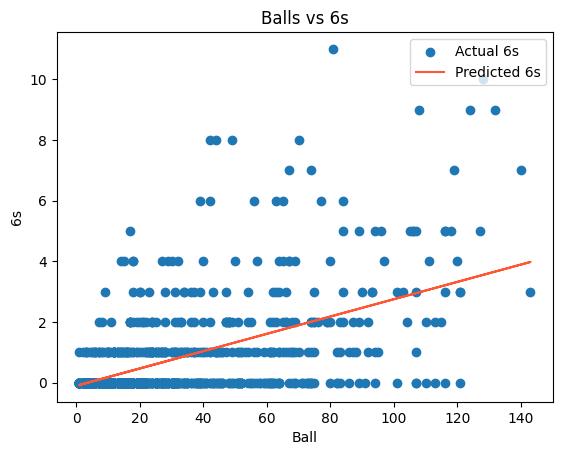

In [23]:
plt.scatter(x2,y2,label = 'Actual 6s')
plt.plot(x2, reg.predict(x2),label = 'Predicted 6s', c = "#FF5733")
plt.legend(loc='upper right')
plt.ylabel("6s")
plt.xlabel("Ball")
plt.title("Balls vs 6s")

In [24]:
reg.score(x2,y2)

0.29925534707232426

## 4s base on Balls

In [25]:
df['4s'] = pd.to_numeric(df['4s'], errors='coerce')
df = df.dropna(subset=['4s', 'Balls'])      

In [26]:
x3 = df[["Balls"]]
y3 = df[["4s"]]

In [27]:
x3 = x3.dropna()
y3 = y3.dropna()

min_len = min(len(x3), len(y3))
x3 = x3[:min_len]
y3 = y3[:min_len]

In [28]:
model3 = reg.fit(x3,y3)

Text(0.5, 1.0, 'Balls vs 4s')

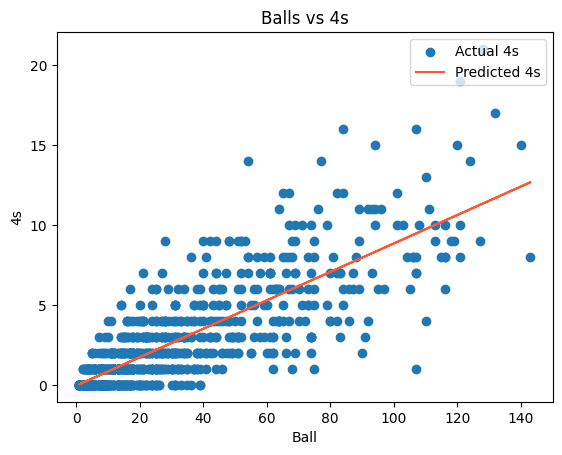

In [29]:
plt.scatter(x3,y3,label = 'Actual 4s')
plt.plot(x3, reg.predict(x3),label = 'Predicted 4s', c = "#FF5733")
plt.legend(loc='upper right')
plt.ylabel("4s")
plt.xlabel("Ball")
plt.title("Balls vs 4s")

In [30]:
reg.score(x3,y3)

0.6577652219928807

## Runs based on Batting position

In [31]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')   

In [32]:
x4 = df[["Batting_Position"]]
y4 = df[["Runs"]]
x4.head()

,Batting_Position
0,1
1,2
2,3
3,4
4,5


In [33]:
x4 = x4.dropna()
y4 = y4.dropna()

min_len = min(len(x4), len(y4))
x4 = x4[:min_len]
y4 = y4[:min_len]

In [34]:
model4 = reg.fit(x4,y4)

Text(0.5, 1.0, 'Batting_Position vs Runs')

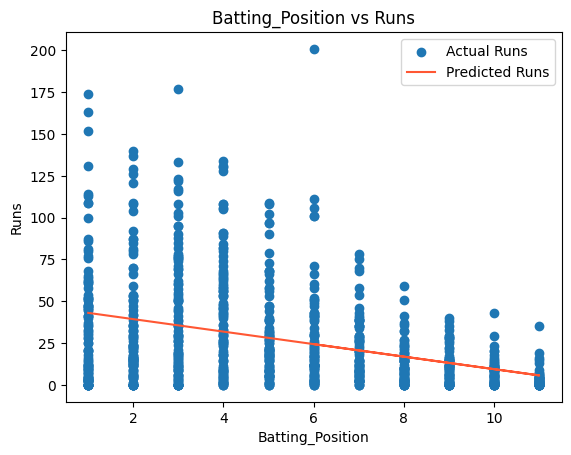

In [35]:
plt.scatter(x4,y4,label = 'Actual Runs')
plt.plot(x4, reg.predict(x4),label = 'Predicted Runs', c = "#FF5733")
plt.legend(loc='upper right')
plt.ylabel("Runs")
plt.xlabel("Batting_Position")
plt.title("Batting_Position vs Runs")

In [36]:
reg.score(x4,y4)

0.1340923995994081